In [61]:
import nltk

In [5]:
nltk.download()

showing info http://www.nltk.org/nltk_data/


True

In [6]:
pwd

'/Users/theophilus/Desktop/Thesis/SanFranciscoCrime'

In [62]:
messages = [line.rstrip() for line in open("smsspamcollection/SMSSpamCollection")]

In [8]:
print(len(messages))

5574


In [63]:
for num ,message in enumerate(messages[:10]):
    print(num,message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [10]:
import pandas

In [11]:
messages = pandas.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [14]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/theophilus/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


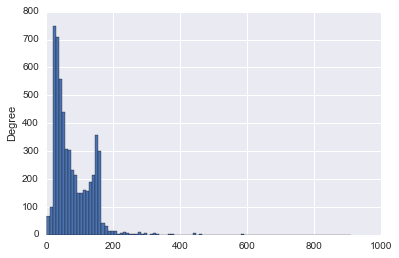

In [19]:
messages['length'].plot(bins=100, kind='hist') 

In [20]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:

mess = 'sample mess ! notice/home : it() is punctuation@'

nopunc = [char for char in mess if char not in string.punctuation]

messnopunc = ' '.join(nopunc)
messnopunc

's a m p l e   m e s s     n o t i c e h o m e     i t   i s   p u n c t u a t i o n'

In [23]:
from nltk.corpus import stopwords

In [24]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [28]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [29]:
# Check to make sure its working
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print (len(bow_transformer.vocabulary_))

11444


In [46]:
vocab = bow_transformer.get_feature_names()
print (vocab)

['0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796XXXXXX', '07973788240', '07XXXXXXXXX', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p',

In [39]:
message4 = messages['message'][3]
message4

'U dun say so early hor... U c already then say...'

In [47]:
train_data_features = bow_transformer.fit_transform(messages['message'].apply(text_process))

In [48]:
train_data_features = train_data_features.toarray()

In [56]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
print (train_data_features.shape)

(5572, 5114)


In [52]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

1 0
1 008704050406
1 0089my
1 0121
1 01223585236
1 01223585334
1 0125698789
1 02
1 020603
1 0207
2 02070836089
2 02072069400
1 02073162414
3 02085076972
2 020903
2 021
1 050703
1 0578
1 06
1 060505
1 061104
1 07008009200
1 07046744435
1 07090201529
2 07090298926
1 07099833605
1 071104
1 07123456789
2 0721072
1 07732584351
1 07734396839
1 07742676969
1 07753741225
1 0776xxxxxxx
1 07786200117
1 077xxx
1 078
1 07801543489
1 07808
1 07808247860
1 07808726822
1 07815296484
2 07821230901
1 0784987
1 0789xxxxxxx
1 0794674629107880867867
1 0796XXXXXX
1 07973788240
1 07XXXXXXXXX
1 07xxxxxxxxx
1 0800
1 08000407165
1 08000776320
1 08000839402
1 08000930705
1 08000938767
1 08001950382
1 08002888812
2 08002986030
1 08002986906
1 08002988890
1 08006344447
1 0808
1 08081263000
1 08081560665
1 0825
1 0844
1 08448350055
1 08448714184
1 0845
1 08450542832
1 08452810071
1 08452810073
1 08452810075over18s
1 0870
1 08700621170150p
1 08701213186
4 08701237397
1 08701417012
1 08701417012150p
1 0870141701216


In [57]:
print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit(train_data_features,messages["label"] )

/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is 

Training the random forest...


/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is 

In [58]:
pred = forest.predict(train_data_features)
pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [60]:
from sklearn.cross_validation import cross_val_score

print(cross_val_score(forest,train_data_features,messages['label']))

/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/theophilus/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is 

array([ 0.89827772,  0.89768444,  0.8917609 ])

In [ ]:
# Read the test data
test = pd.read_csv("testData.tsv", header=0, delimiter="\t", \
                   quoting=3 )

# Verify that there are 25,000 rows and 2 columns
print test.shape

# Create an empty list and append the clean reviews one by one
num_reviews = len(test["review"])
clean_test_reviews = [] 

print "Cleaning and parsing the test set movie reviews...\n"
for i in xrange(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print "Review %d of %d\n" % (i+1, num_reviews)
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append( clean_review )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)

# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

# Use pandas to write the comma-separated output file
output.to_csv( "Bag_of_Words_model.csv", index=False, quoting=3 )

In [40]:
bow4 = bow_transformer.transform([message4])
print(bow4)


  (0, 4073)	2
  (0, 4638)	1
  (0, 5270)	1
  (0, 6214)	1
  (0, 6232)	1
  (0, 7197)	1
  (0, 9570)	2


In [41]:
print (bow4.shape)

(1, 11444)


In [42]:
print(bow_transformer.get_feature_names()[4073])
print( bow_transformer.get_feature_names()[9570])

U
say


In [43]:
messages_bow = bow_transformer.transform(messages['message'])
print ('Shape of Sparse Matrix: ', messages_bow.shape)
print ('Amount of Non-Zero occurences: ', messages_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11444)
Amount of Non-Zero occurences:  50795
sparsity: 0.08%


In [44]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print (tfidf4)

  (0, 9570)	0.538562626293
  (0, 7197)	0.438936565338
  (0, 6232)	0.318721689295
  (0, 6214)	0.299537997237
  (0, 5270)	0.297299574059
  (0, 4638)	0.266198019061
  (0, 4073)	0.408325899334


In [45]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.28005242674
8.5270764989


In [7]:
import nltk

In [8]:
nltk.download()

showing info http://www.nltk.org/nltk_data/


True

In [21]:
x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
data

array([[  9.55074809e-01,   6.91097114e-01,   1.51892849e+00,
          2.14286745e+00,   1.45682526e+00,   1.68104994e+00,
          8.02581562e-01,  -1.14024623e-01,  -5.25654282e-01,
         -2.07368031e-01,  -3.41991039e-01,   1.94723550e-01,
          8.54673845e-01,   1.04268522e+00,   1.09592762e+00,
          1.84287544e+00,   1.66286701e+00,   1.80494355e+00,
          1.15323693e+00,   7.12692791e-01,   3.12193135e-01,
         -1.00719165e-01,  -1.10826821e-01,  -2.90831819e-01,
         -5.62199098e-02,   7.13098479e-01,   9.52972437e-01,
          1.65981591e+00,   1.61070356e+00,   1.62684741e+00,
          1.39555228e+00],
       [  1.20349968e-01,   7.05387619e-01,   1.01322130e+00,
          9.03543793e-01,   4.18245037e-01,   5.83998952e-01,
          3.40784717e-01,  -9.30436313e-02,  -6.93919980e-01,
         -1.60610897e+00,  -9.01745392e-01,  -5.43384866e-01,
         -1.48107153e-01,   4.42844792e-01,   6.67835108e-01,
          8.40741267e-01,   1.01733309e+00,

In [19]:
import pandas as pd
import numpy as np

In [11]:
t = pd.tslib.Timestamp.now()
t

Timestamp('2016-02-26 20:36:57.385309')

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'], df['month'] = df['date'].apply(lambda x: x.year), df['date'].apply(lambda x: x.month)
df

In [12]:
t.to_datetime()

datetime.datetime(2016, 2, 26, 20, 36, 57, 385309)

In [13]:
t.day
t.month
t.year

2016